<a href="https://colab.research.google.com/github/AfonsoPaula/Data-Analysis/blob/main/excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading Exel files**

In this lecture we'll learn how to read Excel files (.xlsx) and its sheets into a pandas **DataFrames**, and how to export that **DataFrame** to different sheets and Excel files using the pandas **ExcelWriter** and **to_excel** methods.

In [1]:
import pandas as pd

## The **read_excel** method

We'll begin with the **read_excel** method, that let us read Excel files into a **DataFrame**.

This method supports both XLS and XLSX file extensions from a local filesystem or URL and has a broad set of parameters to configure how the data will be read and parsed. These parameters are very similar to the parameters we can saw on previous lectures where we introduced the **read_csv** method. The most common parameters are as follows:

- **filesystem**: Path of the file to be read.
- **sheet_name**: Strings are used for sheet names. Integers are used in zero-indexed sheet positions. Lists of strings/integers are used to request multiple sheets. Specify None to get all sheets.
- **header**: Index of the row containing the names of the columns (None if none).
- **index_col**: Index of the column or sequence of indexes that should be used as index of rows of the data.
- **names**: Sequence containing the names of the columns (used together with header = None).
- **skiprows**:  Number of rows or sequence of row indexes to ignore in the load.
- **na_values**: Sequence of values that, if found in the file, should be treated as NaN.
- **dtype**: Dictionary in which the keys will be column names and the values will be types of NumPy to which their content must be converted.
- **parse_dates**: Flag that indicates if Python should try to parse data with a format similar to dates as dates. You can enter a list of column names that must be joined for the parsing as a date.
- **date_parser**: Function to use to try to parse dates.
- **nrows**: Number of rows to read from the beginning of the file.
- **skip_footer**: Number of rows to ignore at the end of the file.
- **squeeze**: Flag that indicates that if the data read only contains one column the result is a Series instead of a DataFrame.
- **thousands**: Character to use to detect the thousands separator.

In this case we'll try to read our **products.xlsx** Excel file.

This file contains records of products with its price, description and merchant information on different sheets.

## Reading our first Excel file

Everytime we call **read_excel** method, we'll need to pass an explicit **filepath** parameter indicating the path where our Excel is.

Any valid string path is acceptable. The string could be a URL schemes include HTTP, FTP, S3, and file. For file URLs, a host is expected. A local file could be: **file://localhost/path/to/table.xlsx**.

In [2]:
df = pd.read_excel('products.xlsx')

df.head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In this case we let pandas infer everything related to our data, but in most of the cases we'll need to explicity tell pandas how we want our data to be loaded. To do that we use parameters.

Let's see how these parameters work.

## The row behaviour with **header** parameter

The Excel file we're reading has the following columns:
- **product_id**
- **price**
- **merchant_id**
- **brand**
- **name**


The first row (0-index) of the data has that column names, so we keep the implicit **header=0** parameter to let Pandas assign this first row as headers. We can overwrite this behaviour defining explicity the **header** parameter.

In [3]:
pd.read_excel('products.xlsx').head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [4]:
pd.read_excel('products.xlsx',
              header=None).head()

,0,1,2,3,4
0,product_id,price,merchant_id,brand,name
1,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
2,AVpgMuGwLJeJML43KY_c,69,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
3,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
4,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...


## Adding index to our data using **index_col** paramater


By default, pandas will automatically assign a numeric autoincremental index or row label starting with zero.

We may want to leave the default index as such if our data doesn't have a column with unique values that can serve as a better index.

In case there is a column that we fell would serve as a better index, we can override the default behaviour by setting **indexing_col** property to a column. It takes a numeric value or a string for setting a single column as index or a list of numric values for creating a multi-index.

In our data, we are choosing the first column, **product_id**, as index (index=0) by passing zero to the **index_col** argument.


In [5]:
df = pd.read_excel('products.xlsx',
                   index_col=[0])

df.head()

,price,merchant_id,brand,name
product_id,,,,
AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


## Selecting specific sheets

Excel files quite have multiple sheets and the ability to read a specific sheet or all of them is very important. To make this easy, the pandas **sheet_names** that tells pandas which sheet to read in the data from.

For this, we can either use the sheet name or the sheet number. Sheet number start with zero. The first sheet will be the one loaded by deafult. We can change sheet by specifying **sheet_name** parameter.

In [6]:
products = pd.read_excel('products.xlsx',
                         sheet_name='Products',
                         index_col='product_id')

In [7]:
products.head()

,price,merchant_id,brand,name
product_id,,,,
AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [8]:
merchants = pd.read_excel('products.xlsx',
                          sheet_name='Merchants',
                          index_col='merchant_id')

In [9]:
merchants.head()

,merchant
merchant_id,
1001,Bestbuy.com
1002,Walmart.com
1003,Bestbuy.com
1004,Growkart
1005,bhphotovideo.com


## The **ExcelFile** class

Another approach on reading Excel data is using the **ExcelFile** class for parsing tabular Excel sheets into **DataFrame** objects.

The **ExcelFile** will let us work with sheets easily, and will be faster than the previous **read_excel** method.

In [10]:
excel_file = pd.ExcelFile('products.xlsx')

We can now explore the sheets on that Excel file with **sheet_names**:

In [11]:
excel_file.sheet_names

['Products', 'Descriptions', 'Merchants']

And parse specified sheet(s) into Pandas' **DataFrame** using ExcelFile's **parse()** method.

Everytime we call **parse()** method, we'll need to pass an explicit **sheet_name** parameter indicating which sheet from the Excel file we want to be parsed. First sheet will be parsed by default.

In [12]:
products = excel_file.parse('Products')

In [13]:
products.head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


The **parse()** method has all the paramaters we saw before on **read_excel()**, let's try some of them:

In [14]:
products = excel_file.parse(sheet_name='Products',
                            header=0,
                            index_col='product_id')

products.head()

,price,merchant_id,brand,name
product_id,,,,
AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [15]:
products.dtypes

price          float64
merchant_id      int64
brand           object
name            object
dtype: object

In [16]:
merchants = excel_file.parse('Merchants',
                             index_col='merchant_id')

merchants.head()

,merchant
merchant_id,
1001,Bestbuy.com
1002,Walmart.com
1003,Bestbuy.com
1004,Growkart
1005,bhphotovideo.com


In [17]:
merchants.dtypes

merchant    object
dtype: object

## Save to Excel File

Finally we can save our **DataFrame** as a Excel file.

In [18]:
products.head()

,price,merchant_id,brand,name
product_id,,,,
AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


A fast, simple way to write a single **DataFrame** to an Excel file is to use the **to_excel()** method of the **DataFrame** directly.

Note that if it's required to pass a output file path (the **OpenPyXL - openpyxl** library should be installed in order to save Excel files (**pip install openpyxl**))

In [19]:
products.to_excel('out.xlsx')

In [20]:
pd.read_excel('out.xlsx').head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


We can specify the sheet name with **sheet_name** parameter:

In [21]:
products.to_excel('out.xlsx',
                    sheet_name='Products')

Further calls of **to_excel** with different sheet names will only overwrite the first sheet instead of adding additional sheets.

Also, be aware that by removing the index, we'll lose that column.

In [22]:
products.to_excel('out.xlsx',
                  index=None)

In [23]:
pd.read_excel('out.xlsx').head()

,price,merchant_id,brand,name
0,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


## Positioning Data with **startrow** and **startcol**

Suppose we wanted to insert the our data into the spreadsheet file a position somewhere other than the top-left corner.

We can shift where the **to_excel** method writes the data by using **startrow** to set the cell after which the first row will be printed, and **startcol** to set which cell after which the first column will be printed.

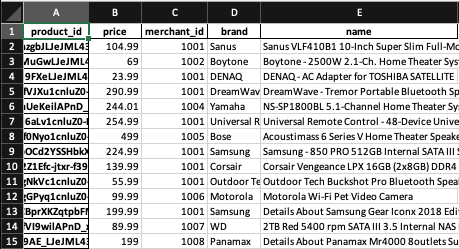

In [24]:
products.to_excel('out.xlsx',
                  sheet_name='Products',
                  startrow=1,
                  startcol=2)

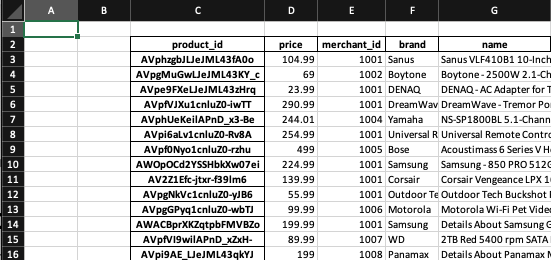

##Saving multiple sheets

If we wanted to write a single **DataFrame** to a single sheet with default formatting then we are done. However, if we want to write multiple sheets and/or multiple **DataFrames**, then we will need to create a **ExcelWriter** object.

The **ExcelWriter** object is included in the Pandas module and is used to open Excel files and handle write operations. This object behaves almost exactly like the vanilla Python **open** object what we used on previous notebooks and can be used within a **with** block.

When the **ExcelWriter** object is executed, any existing file with the same name as the output file will be overwritten.

In [30]:
writer = pd.ExcelWriter('out.xlsx')

In [31]:
writer

Instead of including the file pathname in the **to_excel** call, we will use the **ExcelWriter** object **writer** instead.

In [27]:
with writer:
  products.to_excel(writer, sheet_name='Products')

In [28]:
pd.read_excel('out.xlsx', sheet_name='Products').head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


We can now add another **Merchants** sheet simply using the **writer** object:

In [32]:
with writer:
    merchants.to_excel(writer, sheet_name='Merchants')

In [34]:
pd.read_excel('out.xlsx', sheet_name='Merchants').head()

,merchant_id,merchant
0,1001,Bestbuy.com
1,1002,Walmart.com
2,1003,Bestbuy.com
3,1004,Growkart
4,1005,bhphotovideo.com


Or we can save multiple sheets at the same time:

In [35]:
with pd.ExcelWriter('out.xlsx') as writer:
    products.to_excel(writer, sheet_name='Products')
    merchants.to_excel(writer, sheet_name='Merchants')

In that case the resulting **out.xlsx** file will have to sheets **Products** and **Merchants**.